In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
X = digits.data
digits.data.shape

(1797, 64)

In [5]:
y = digits.target
digits.target.shape

(1797,)

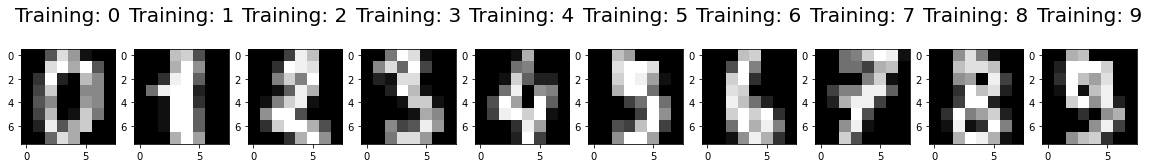

In [6]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)

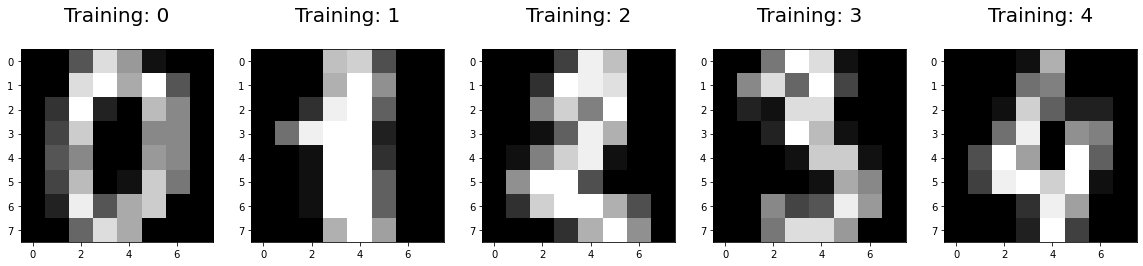

In [7]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)

In [8]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, default: `.mlab.detrend_none` (no detrending)
            A detrending function applied to *x*.  It must have the
            signature ::
        
                detrend(x: np.ndarray) -> np.ndarray
        
        normed : bool, default: True
            If `

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [23]:
print("Trained input data: ", X_train.shape)


Trained input data:  (1437, 64)


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
model

C:\Users\Sehrish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
model.predict(X_test[0:5])
# model.predict(X_test)

array([2, 8, 2, 6, 6])

In [26]:
score = model.score(X_test, y_test)
print("Acuuracy score is : " ,score)

Acuuracy score is :  0.9666666666666667


In [27]:
from sklearn import metrics
# from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

In [71]:
print(pd.crosstab(y_test, predictions))

col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      27   0   0   0   0   0   0   0   0   0
1       0  34   0   0   0   0   0   0   1   0
2       0   0  35   1   0   0   0   0   0   0
3       0   0   0  29   0   0   0   0   0   0
4       0   0   0   0  29   0   0   1   0   0
5       0   0   0   0   0  37   0   0   0   3
6       0   1   0   0   0   0  43   0   0   0
7       0   0   0   0   1   0   0  38   0   0
8       0   2   1   0   0   0   0   0  36   0
9       0   0   0   0   0   1   0   0   0  40


Text(0.5, 1.0, 'Accuracy Score: 0.9666666666666667')

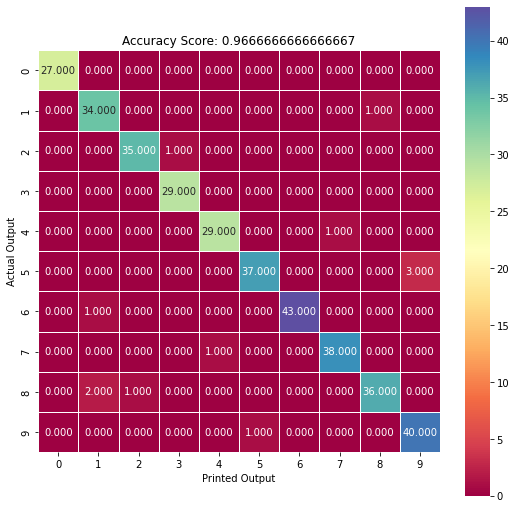

In [28]:
# heat map
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = ".3f", linewidths=.5, square = True,cmap = 'Spectral')
plt.ylabel("Actual Output");
plt.xlabel("Printed Output");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title)




In [29]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [74]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
        index +=1
     
misclassifiedIndexes     

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

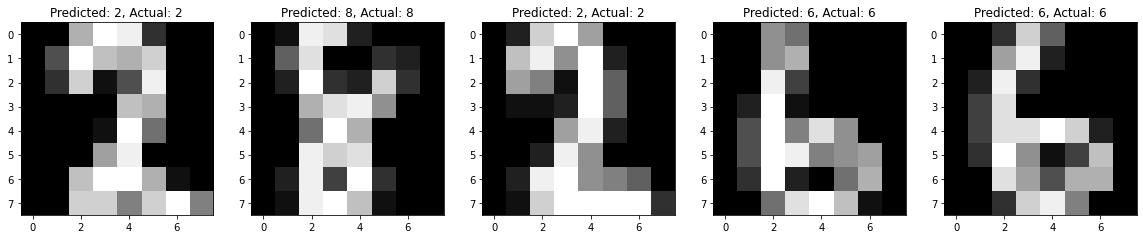

In [75]:
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5, plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex], fontsize= 20))

In [76]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [77]:
logisticRegr.fit(X_train, y_train)

C:\Users\Sehrish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
logisticRegr.predict(X_train[0].reshape(1,-1))

array([6])

In [80]:
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [83]:
predictions = logisticRegr.predict(X_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [82]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9666666666666667


In [106]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1  

misclassifiedIndexes

[56, 84, 94, 118, 124, 130, 181, 196, 235, 315, 331, 335]

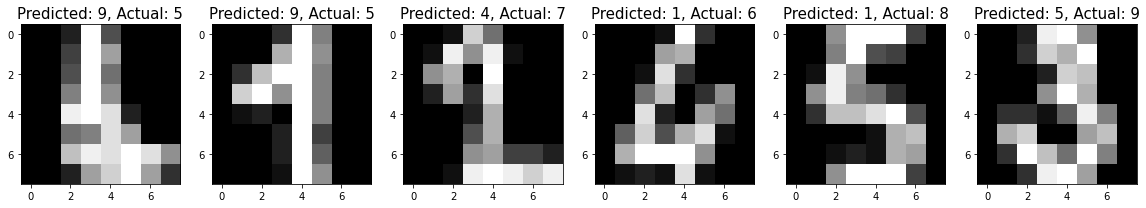

In [104]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
 plt.subplot(1,6, plotIndex + 1)
 plt.imshow(np.reshape(X_train[badIndex], (8,8)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

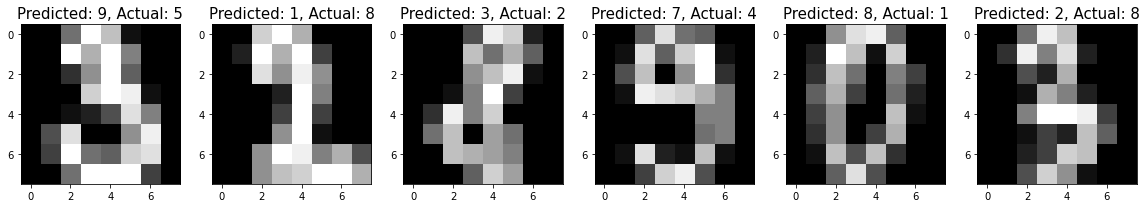

In [105]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[6:13]):
 plt.subplot(1,6, plotIndex + 1)
 plt.imshow(np.reshape(X_train[badIndex], (8,8)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)